In [21]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [22]:
#loading in the census data which holds 
csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df=sales_df.rename(index=str, columns={"United States": "United States Home Sales", 
                                                 "South": "South Home Sales", 
                                                 "West": "West Home Sales"})
sales_df.head()

,Year,United States Home Sales,South Home Sales,West Home Sales
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [23]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [24]:
unemploy_rate= rate_df.groupby(["Year"]).mean()['Unemployment Rate']
unemploy_rate_df = pd.DataFrame(unemploy_rate)
unemploy_rate_df.head()

,Unemployment Rate
Year,
1954,5.650000
1955,4.366667
1956,4.125000
1957,4.300000
1958,6.841667


In [25]:
sales_unemploy_df = pd.merge(sales_df,unemploy_rate_df, on="Year", how="outer")
sales_unemploy_df=sales_unemploy_df.rename(index=str, columns={'Unemployment Rate': 'National Unemployment Rate'})
sales_unemploy_df.head()

,Year,United States Home Sales,South Home Sales,West Home Sales,National Unemployment Rate
0,1963,560.0,199.0,141.0,5.641667
1,1964,565.0,200.0,129.0,5.158333
2,1965,575.0,210.0,129.0,4.508333
3,1966,461.0,166.0,99.0,3.791667
4,1967,487.0,179.0,119.0,3.841667


In [26]:
csvpath3="Resources\SouthData.csv"
south_data = pd.DataFrame(pd.read_csv(csvpath3))
south_data.head()

,Year,South
0,1980,6.26
1,1981,6.85
2,1982,8.78
3,1983,9.02
4,1984,7.06


In [27]:
add_south_df = pd.merge(sales_unemploy_df, south_data, on="Year", how="outer")
add_south_df = add_south_df.rename(index=str, columns={'South': 'South Unemployment Rate'})
add_south_df.head()

,Year,United States Home Sales,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate
0,1963,560.0,199.0,141.0,5.641667,NaN
1,1964,565.0,200.0,129.0,5.158333,NaN
2,1965,575.0,210.0,129.0,4.508333,NaN
3,1966,461.0,166.0,99.0,3.791667,NaN
4,1967,487.0,179.0,119.0,3.841667,NaN


In [28]:
csvpath4 = "Resources\WestData.csv"
west_data = pd.DataFrame(pd.read_csv(csvpath4))
west_data.head()

,Year,West
0,1980,6.88
1,1981,7.42
2,1982,9.86
3,1983,9.52
4,1984,7.53


In [29]:
unemployment_df = pd.merge(add_south_df, west_data, on="Year", how="outer")
unemployment_df = unemployment_df.rename(index=str, columns={'West': 'West Unemployment Rate'})
unemployment_df = unemployment_df.dropna(how="any")
unemployment_df.head()

,Year,United States Home Sales,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate,West Unemployment Rate
17,1980,545.0,267.0,145.0,7.175000,6.26,6.88
18,1981,436.0,219.0,112.0,7.616667,6.85,7.42
19,1982,412.0,219.0,99.0,9.708333,8.78,9.86
20,1983,623.0,323.0,152.0,9.600000,9.02,9.52
21,1984,639.0,309.0,160.0,7.508333,7.06,7.53


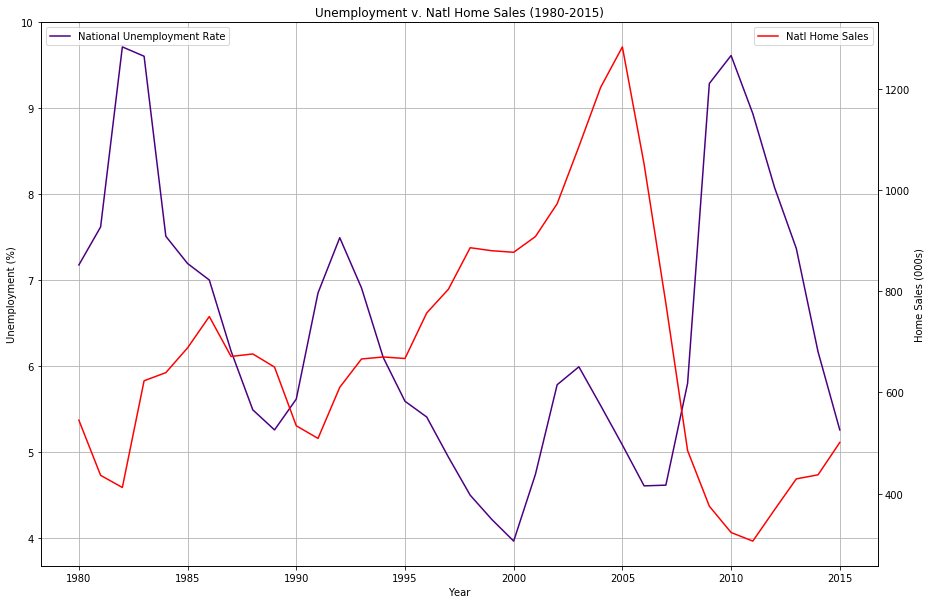

In [30]:
natl_home_sales=[]
for sale in unemployment_df["United States Home Sales"]:
    int_natl_sale=int(sale)
    natl_home_sales.append(int_sale)
fig, ax1=plt.subplots(figsize=(15,10))
x=np.arange(1980,2016)
n=unemployment_df['National Unemployment Rate']
ax1.plot(x,n, color='indigo', label="National Unemployment Rate")
ax2=ax1.twinx()
ax2.plot(x,home_sales,color="r", label='Natl Home Sales')
ax1.grid()
ax1.set_title('Unemployment v. Natl Home Sales (1980-2015)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment (%)')
ax2.set_ylabel('Home Sales (000s)')
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.savefig('Graph Images/Unemployment_Home_Sales.png')

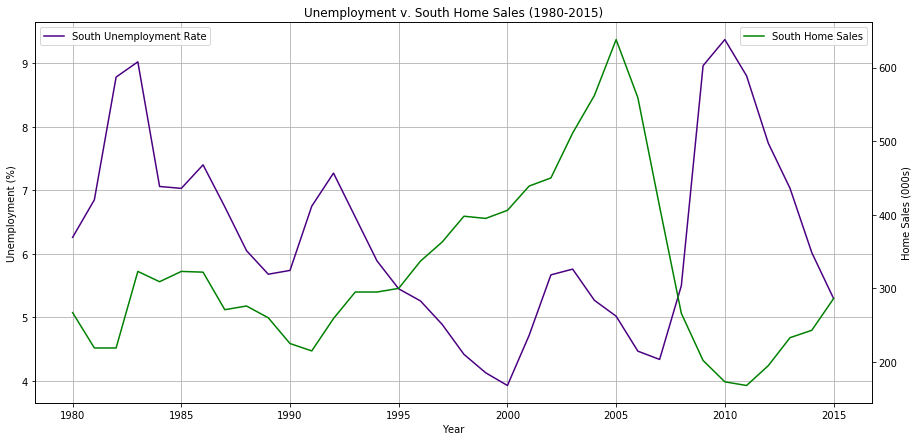

In [31]:
south_sales=[]
for sale in unemployment_df["South Home Sales"]:
    int_south_sale=int(sale)
    south_sales.append(int_south_sale)
fig, ax3=plt.subplots(figsize=(15,7))
x=np.arange(1980,2016)
s=unemployment_df['South Unemployment Rate']
ax3.plot(x,s,color="indigo", label="South Unemployment Rate")
ax4=ax3.twinx()
ax4.plot(x,south_sales,color="g", label='South Home Sales')
ax3.grid()
ax3.set_title('Unemployment v. South Home Sales (1980-2015)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax4.set_ylabel('Home Sales (000s)')
ax3.legend(loc="upper left")
ax4.legend(loc="upper right")
plt.savefig('Graph Images/Unemployment_South_Sales.png')

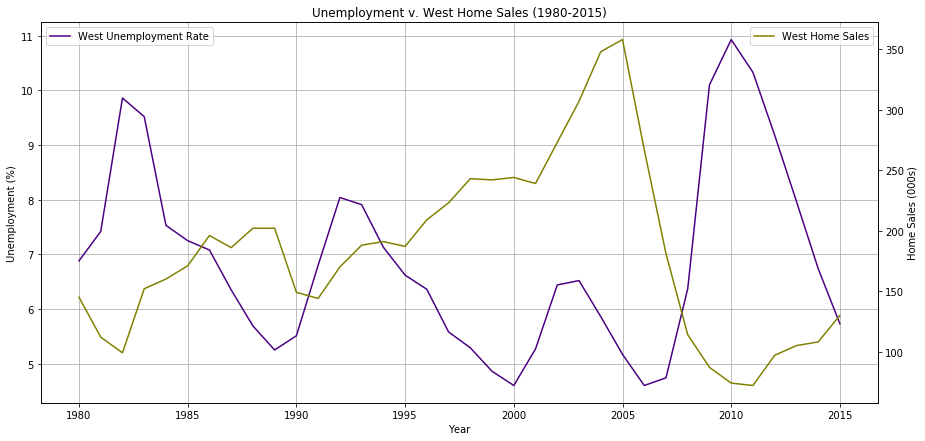

In [32]:
west_sales=[]
for sale in unemployment_df["West Home Sales"]:
    int_west_sale=int(sale)
    west_sales.append(int_west_sale)
fig, ax5=plt.subplots(figsize=(15,7))
x=np.arange(1980,2016)
w=unemployment_df['West Unemployment Rate']
ax5.plot(x,w,color="indigo", label="West Unemployment Rate")
ax6=ax5.twinx()
ax6.plot(x,west_sales,color="olive", label='West Home Sales')
ax5.grid()
ax5.set_title('Unemployment v. West Home Sales (1980-2015)')
ax5.set_xlabel('Year')
ax5.set_ylabel('Unemployment (%)')
ax6.set_ylabel('Home Sales (000s)')
ax5.legend(loc="upper left")
ax6.legend(loc="upper right")
plt.savefig('Graph Images/Unemployment_West_Sales.png')

In [33]:
#ttest of National Unemployment and National Home Sales
stats.ttest_ind(natl_home_sales,unemployment_df['National Unemployment Rate'], equal_var=False )

Ttest_indResult(statistic=1843.3694696739778, pvalue=7.103711343710492e-89)

In [34]:
#ttest of West Unemployment and West Home Sales
stats.ttest_ind(west_sales,unemployment_df['West Unemployment Rate'], equal_var=False )

Ttest_indResult(statistic=14.552026056945616, pvalue=2.018052542030696e-16)

In [35]:
#ttest of South Unemployment and South Home Sales
stats.ttest_ind(south_sales,unemployment_df['South Unemployment Rate'], equal_var=False )

Ttest_indResult(statistic=16.51519491933106, pvalue=4.225900660914583e-18)

In [37]:
print(unemployment_df['South Home Sales'].corr(unemployment_df['South Unemployment Rate']),
unemployment_df['West Home Sales'].corr(unemployment_df['West Unemployment Rate']),
unemployment_df['United States Home Sales'].corr(unemployment_df['National Unemployment Rate']))

-0.6449103431397425 -0.6814470807072108 -0.6664071297074259


In [39]:

unemp_post_TwoK= unemployment_df[24:37]
print(unemp_post_TwoK['South Home Sales'].corr(unemp_post_TwoK['South Unemployment Rate']),
unemp_post_TwoK['West Home Sales'].corr(unemp_post_TwoK['West Unemployment Rate']),
unemp_post_TwoK['United States Home Sales'].corr(unemp_post_TwoK['National Unemployment Rate']))

-0.7588415854949673 -0.7026181706044661 -0.7171962337825063


In [40]:

unemp_pre_TwoK= unemployment_df[0:24]
print(unemp_pre_TwoK['South Home Sales'].corr(unemp_pre_TwoK['South Unemployment Rate']),
unemp_pre_TwoK['West Home Sales'].corr(unemp_pre_TwoK['West Unemployment Rate']),
unemp_pre_TwoK['United States Home Sales'].corr(unemp_pre_TwoK['National Unemployment Rate']))

-0.5354642664862953 -0.6196643052311452 -0.6405202323619851
